# Auto MPG

The aim of this project is to predict the mile per gallon consumption of a vheicle given some other atributes of the vehicle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the data:

In [2]:
#!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Data
The data includes the number of cylinders, horsepower, weight, acceleration, production year and the origin of the vehicle.

In [3]:
#Defining the column names based on the data description
cols = ['MPG', 'Cylinders', 'Displacements', 'Horsepower', 'Weight', 
        'Acceleration', 'Model Year', 'Origin']
# Reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                 comment = '\t', sep =" ", skipinitialspace=True)

# Making copy of the dataframe
data = df.copy()
data.head()


,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MPG            398 non-null    float64
 1   Cylinders      398 non-null    int64  
 2   Displacements  398 non-null    float64
 3   Horsepower     392 non-null    float64
 4   Weight         398 non-null    float64
 5   Acceleration   398 non-null    float64
 6   Model Year     398 non-null    int64  
 7   Origin         398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
# Null values
data.isnull().sum()

MPG              0
Cylinders        0
Displacements    0
Horsepower       6
Weight           0
Acceleration     0
Model Year       0
Origin           0
dtype: int64

In [6]:
data.describe()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


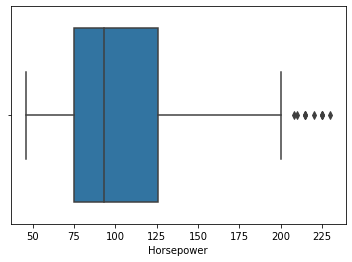

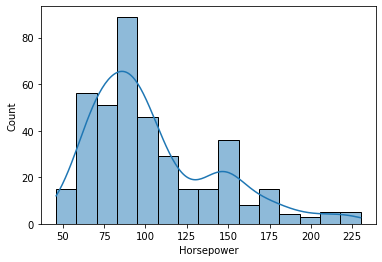

In [7]:
sns.boxplot(x=data['Horsepower'])
plt.show()
sns.histplot(x=data['Horsepower'], kde= True, bins=15)
plt.show()

There are few outliers, we will complete the information using the median of the value.

In [8]:
median = data['Horsepower'].median()
data['Horsepower'] = data ['Horsepower'].fillna(median)

## Category type variables
There are two categorical varables, cylinders(?) and origin.

In [9]:
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [10]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

## Correlation Plot
The MPG column has a negative correlation with the displacement, weight and horsepower features.

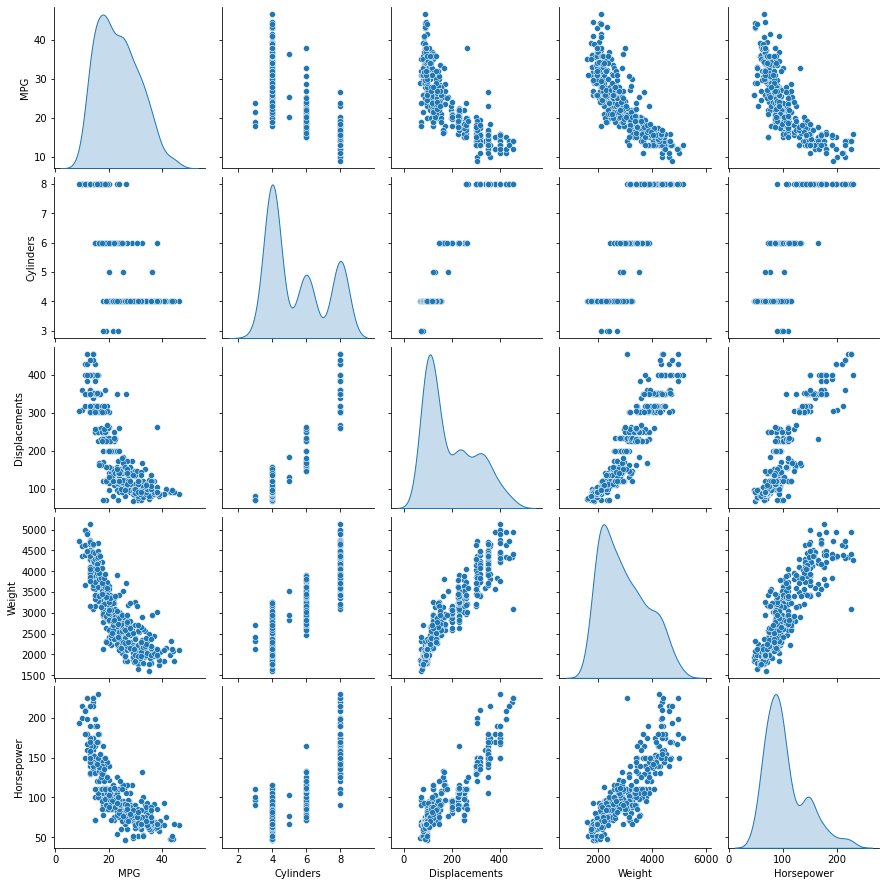

In [11]:
sns.pairplot(data[["MPG", "Cylinders", "Displacements", "Weight", "Horsepower"]], diag_kind="kde")

# Data split for test

Two ways to split the data are tested here; the first one using the simple sklearn method train_test_split() and the second one using stratified sampling that came to be more convenient since it splits the data in homogeneous groups to ensure representation of the overal population.

In [15]:
# Using usual split
from sklearn.model_selection import train_test_split

split_train, split_test = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
##checking for cylinder category distribution in training set with train_test_split()
split_train['Cylinders'].value_counts() / len(split_train)

4    0.509434
8    0.248428
6    0.220126
3    0.012579
5    0.009434
Name: Cylinders, dtype: float64

In [17]:
##checking for cylinder category distribution in training set with train_test_split()
# In this case cars with 3 and 5 cylinders didnt make it to the test set

split_test["Cylinders"].value_counts() / len(split_test)

4    0.525
8    0.300
6    0.175
Name: Cylinders, dtype: float64

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [19]:
##checking for cylinder category distribution in training set

train_set['Cylinders'].value_counts() / len(train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [20]:
##checking for cylinder category distribution in training set
# here we have a better representation for the variable cylinders (still 5 is missing)
test_set["Cylinders"].value_counts() / len(test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

## Origin Column
Making one-hot encoding for the origin column

In [22]:
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
train_set.sample(10)

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Origin
43,13.0,8,400.0,170.0,4746.0,12.0,71,India
151,31.0,4,79.0,67.0,2000.0,16.0,74,USA
335,35.0,4,122.0,88.0,2500.0,15.1,80,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
177,23.0,4,115.0,95.0,2694.0,15.0,75,USA
86,14.0,8,304.0,150.0,3672.0,11.5,73,India
393,27.0,4,140.0,86.0,2790.0,15.6,82,India
91,13.0,8,400.0,150.0,4464.0,12.0,73,India
287,16.5,8,351.0,138.0,3955.0,13.2,79,India
311,32.1,4,98.0,70.0,2120.0,15.5,80,India


In [23]:
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacements,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


## Features engineering
Exploring variables that could be useful for the analysis.

Two new variables with high correlation to the MPG were discovered: acceleration_on_cyl and acceleration_on_power

In [25]:
## testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacements'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacements           -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64